# The dataset

Dataset yang digunakan merupakan data book-crossing yang terdiri dari tiga file dalam ekstensi CSV yaitu:
1. BX-Users.csv
2. BX-Books.csv
3. BX-Book-Ratings.csv

In [1]:
#Loading neccesary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import sys
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#Load dataset from bookcrossing
users = pd.read_csv("D:/MATA KULIAH/SEMESTER 7/PD_DAMI/Proyek/Data set/BX/BX-Users.csv", names=['User-ID', 'Location', 'Age'], encoding='latin-1', skiprows=1)
books = pd.read_csv("D:/MATA KULIAH/SEMESTER 7/PD_DAMI/Proyek/Data set/BX/BX-Books.csv", names=['ISBN', 'Book-Title' ,'Book-Author','Year-Of-Publication', 'Publisher', 'Image-Url-S', 'Image-Url-M', 'Image-Url-L'], encoding='latin-1', skiprows=1)
ratings = pd.read_csv("D:/MATA KULIAH/SEMESTER 7/PD_DAMI/Proyek/Data set/BX/BX-Book-Ratings.csv", names=['User-ID', 'ISBN', 'Book-Rating'], encoding='latin-1', skiprows=1)

In [3]:
#Print users header
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
#Print users tail
users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [5]:
#Print books header
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
#Print books tail
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271378,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [7]:
#Print ratings header
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [8]:
#Print ratings tail
ratings.tail()

,User-ID,ISBN,Book-Rating
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0
1048574,250764,515069434,0


In [9]:
#Print books info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-Url-S          271379 non-null  object
 6   Image-Url-M          271379 non-null  object
 7   Image-Url-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [10]:
#Print users info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
#Print ratings info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [12]:
data = pd.merge(ratings, users, on='User-ID', how='inner')

In [13]:
data = pd.merge(data, books, on='ISBN', how='inner')

In [14]:
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-Url-S',
       'Image-Url-M', 'Image-Url-L'],
      dtype='object')

In [15]:
print("Dataset memiliki {} rows dan {} columns".format(data.shape[0], data.shape[1]))

Dataset memiliki 179102 rows dan 12 columns


In [16]:
data

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...,...,...
179097,250750,1552790207,8,"vero beach, florida, usa",44.0,The Black Pope,David Lynn Anderson,1999,Picasso Publications,http://images.amazon.com/images/P/1552790207.0...,http://images.amazon.com/images/P/1552790207.0...,http://images.amazon.com/images/P/1552790207.0...
179098,250750,1567920950,0,"vero beach, florida, usa",44.0,Reading in Bed: Personal Essays on the Glories...,Steven Gilbar,1999,David R. Godine Publisher,http://images.amazon.com/images/P/1567920950.0...,http://images.amazon.com/images/P/1567920950.0...,http://images.amazon.com/images/P/1567920950.0...
179099,250750,1587990008,0,"vero beach, florida, usa",44.0,Latticework: The New Investing,Robert G. Hagstrom,2000,Thomson Texere,http://images.amazon.com/images/P/1587990008.0...,http://images.amazon.com/images/P/1587990008.0...,http://images.amazon.com/images/P/1587990008.0...
179100,250764,002736660X,0,"cove, oregon, usa",NaN,Branigan's Dog,Fran Grace,1981,Simon &amp; Schuster Merchandise &amp;,http://images.amazon.com/images/P/002736660X.0...,http://images.amazon.com/images/P/002736660X.0...,http://images.amazon.com/images/P/002736660X.0...


# Data Cleaning

In [17]:
data.drop(['Image-Url-S','Image-Url-M','Image-Url-L', 'Book-Author', 'Year-Of-Publication', 'Publisher'],axis=1,inplace=True)

In [18]:
data

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel
...,...,...,...,...,...,...
179097,250750,1552790207,8,"vero beach, florida, usa",44.0,The Black Pope
179098,250750,1567920950,0,"vero beach, florida, usa",44.0,Reading in Bed: Personal Essays on the Glories...
179099,250750,1587990008,0,"vero beach, florida, usa",44.0,Latticework: The New Investing
179100,250764,002736660X,0,"cove, oregon, usa",NaN,Branigan's Dog


In [19]:
data['Book-Title'] = data['Book-Title'].str.strip()
data['Book-Title'] = data['Book-Title'].str.lower()

In [20]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title
0,276725,034545104X,0,"tyler, texas, usa",NaN,flesh tones: a novel
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,flesh tones: a novel
2,6543,034545104X,0,"strafford, missouri, usa",34.0,flesh tones: a novel
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,flesh tones: a novel
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,flesh tones: a novel


# Pengecekan Data yang hilang atau missing data

In [21]:
jumlah = data.isnull().sum().sort_values(ascending=False)
persentase = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([jumlah, persentase], axis=1, keys=['Jumlah', 'Pesentase Missing Data'])
missing_data['Pesentase Missing Data'] = missing_data['Pesentase Missing Data'].apply(lambda x: x * 100)

In [22]:
missing_data.loc[missing_data['Pesentase Missing Data'] > 10]

,Jumlah,Pesentase Missing Data
Age,44773,24.998604


In [23]:
print('Data yang hilang atau missing data')
round(data.isnull().sum() / len(data) * 100, 4)

Data yang hilang atau missing data


User-ID         0.0000
ISBN            0.0000
Book-Rating     0.0000
Location        0.0000
Age            24.9986
Book-Title      0.0000
dtype: float64

# Replace Nilai NaN pad Data Age

In [24]:
age = data['Age']
mean_age = age.mean()
median_age = age.median()

In [25]:
mean_age

36.23493065533131

In [26]:
median_age

34.0

In [27]:
round(mean_age)

36

In [28]:
mean_age = round(mean_age)

In [29]:
age.fillna(value = median_age, inplace = True)

In [30]:
jumlah = data.isnull().sum().sort_values(ascending=False)
persentase = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([jumlah, persentase], axis=1, keys=['Jumlah', 'Pesentase Missing Data'])
missing_data['Pesentase Missing Data'] = missing_data['Pesentase Missing Data'].apply(lambda x: x * 100)

In [31]:
missing_data.loc[missing_data['Pesentase Missing Data'] > 10]

,Jumlah,Pesentase Missing Data


In [32]:
print('Data yang hilang atau missing data')
round(data.isnull().sum() / len(data) * 100, 4)

Data yang hilang atau missing data


User-ID        0.0
ISBN           0.0
Book-Rating    0.0
Location       0.0
Age            0.0
Book-Title     0.0
dtype: float64

In [33]:
print('Rata-rata rating buku: ', round(data['Book-Rating'].mean()))

Rata-rata rating buku:  3


In [34]:
print('Rata-rata rating buku: ', round(data['Book-Rating'].mean(), 5))

Rata-rata rating buku:  3.12777


# Prepare Dataset

In [35]:
country = data['Location'].apply(lambda row: str(row).split(',')[-1])
data.groupby(country)['Book-Rating'].count().sort_values(ascending=False).head(10)

Location
 usa               99160
 germany           15057
 canada            12820
FALSE               8766
 spain              7652
 france             7008
 united kingdom     6234
                    3702
 n/a                2905
 australia          2855
Name: Book-Rating, dtype: int64

In [36]:
Age = data['Age'].apply(lambda row: str(row).split(',')[-1])
data.groupby(Age)['Book-Rating'].count().sort_values(ascending=False).head(15)

Age
34.0    49644
29.0     6228
28.0     5385
30.0     5281
33.0     5079
26.0     4907
36.0     4792
27.0     4699
32.0     4688
31.0     4618
24.0     4013
44.0     3986
25.0     3925
23.0     3890
38.0     3835
Name: Book-Rating, dtype: int64

In [37]:
Age = data['Age'].apply(lambda row: str(row).split(',')[-1])
data.groupby(Age)['Book-Title'].count().sort_values(ascending=False).head(15)

Age
34.0    49644
29.0     6228
28.0     5385
30.0     5281
33.0     5079
26.0     4907
36.0     4792
27.0     4699
32.0     4688
31.0     4618
24.0     4013
44.0     3986
25.0     3925
23.0     3890
38.0     3835
Name: Book-Title, dtype: int64

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

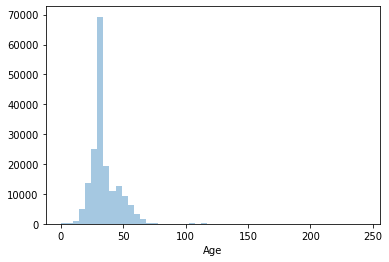

In [38]:
sns.distplot(data['Age'].dropna(), kde=False)

In [39]:
print('Jumlah outliers: ', sum(data['Age'] > 100))

Jumlah outliers:  481


In [40]:
print('Jumlah pengguna: ',data['User-ID'].nunique())

Jumlah pengguna:  34821


In [41]:
print('Jumlah buku: ', data['ISBN'].nunique())

Jumlah buku:  67381


In [42]:
print('Jumlah buku: ', data['Book-Title'].nunique())

Jumlah buku:  60453


In [43]:
print('Jumlah outliers: ', sum(data['Book-Rating'] > 1))

Jumlah outliers:  73415


<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

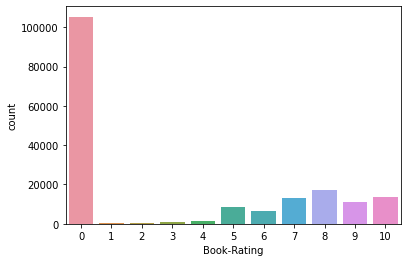

In [44]:
sns.countplot(x='Book-Rating', data=data)

In [45]:
data['Book-Rating'] = data['Book-Rating'].replace(0, None)

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

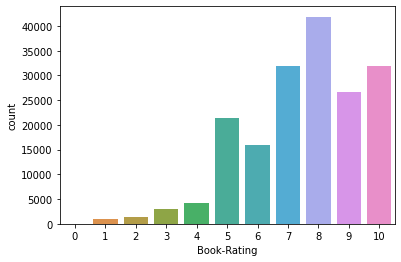

In [46]:
sns.countplot(x='Book-Rating', data=data)

In [47]:
data.describe()

,User-ID,Book-Rating,Age
count,179102.000000,179102.000000,179102.000000
mean,126435.402050,7.532914,35.676229
std,74248.244032,1.890382,11.911452
min,8.000000,0.000000,0.000000
25%,61619.000000,6.000000,29.000000
50%,126827.500000,8.000000,34.000000
75%,189835.000000,9.000000,40.000000
max,278854.000000,10.000000,244.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179102 entries, 0 to 179101
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      179102 non-null  int64  
 1   ISBN         179102 non-null  object 
 2   Book-Rating  179102 non-null  int64  
 3   Location     179102 non-null  object 
 4   Age          179102 non-null  float64
 5   Book-Title   179102 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 14.6+ MB


# Apriori Algorithm

In [75]:
from mlxtend.frequent_patterns import association_rules, apriori

In [63]:
jumlah = data.groupby(['User-ID', 'Age', 'ISBN', 'Book-Rating', 'Book-Title'])['Book-Title'].count().reset_index(name ='Count')


In [68]:
jumlah

,User-ID,Age,ISBN,Book-Rating,Book-Title,Count
0,8,34.0,074322678X,5,where you'll find me: and other stories,1
1,8,34.0,080652121X,5,hitler's secret bankers: the myth of swiss neu...,1
2,8,34.0,1552041778,5,jane doe,1
3,8,34.0,1558746218,5,a second chicken soup for the woman's soul (ch...,1
4,8,34.0,1567407781,6,the witchfinder (amos walker mystery series),1
...,...,...,...,...,...,...
179097,278851,33.0,1558531025,8,life's little instruction book (life's little ...,1
179098,278851,33.0,1566910102,5,oregon handbook (the americas series),1
179099,278851,33.0,1569661057,10,"dallas street map guide and directory, 2000 ed...",1
179100,278851,33.0,1885071213,7,"highpoint adventures, a pocket guide to the 50...",1


In [89]:
market = pd.pivot_table(data=jumlah,index='User-ID',columns='Book-Title',values='Count', \
                        aggfunc='sum',fill_value=0)

MemoryError: Unable to allocate 15.7 GiB for an array with shape (34821, 60453) and data type float64

In [ ]:
market.head(15)

In [ ]:

# Apply apriori algorithm to data with min support threshold of 0.01.
my_frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
my_frequent_itemsets

In [ ]:
# Apply apriori algorithm to data with min support threshold of 0.001.
my_frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
my_frequent_itemsets

In [ ]:
# Apply apriori algorithm to data with a two-item limit.
frequent_itemsets = apriori(onehot, min_support = 0.00005, max_len = 2, use_colnames = True)